# Manejo de Pytorch

Guillermo Segura Gómez

El auge de las redes neuronales se da gracias a la posibilidad de paralelización de operaciones en una computadora. Una CPU puede realizar tareas secuenciales en sus múltiples núcleos, sin embargo una GPU se especializa en ejecutar operaciones en paralelo en sus múltiples núcleos. Esto permite poder realizar renderizado mas rápido, o mostrar video de mejor calidad, ya que son tareas que se pueden paralelizar. En el contexto de la inteligencia artificial, el entrenamiento de un modelo también es paralelizable. La librería Pytorch proporciona una clase central, los **tensores** de pytorch, que son similares a los arrays de numpy salvo porque los tensores pueden trabajar en GPU.

Para poder trabajar con GPU, Pytorch tiene soporte en distintas plataformas que poseen GPU. La plataforma mas utilizada y mejor integrada con pytorch es CUDA de NVIDIA. Sin embargo existen diferentes maneras de aprovechar la GPU en pytorch:

* **CUDA**: NVDIA es una empresa dedicada al diseño y fabricación de procesadores GPU. NVDIA proporciona una API (Interfaz de Programación de Aplicaciones) llamada **CUDA** que permite la creación de programas paralelos masivos que utilizan GPU. 
* **ROCm**:  PyTorch también tiene soporte para GPUs de AMD mediante ROCm (Radeon Open Compute). Aunque ROCm no está tan ampliamente soportado como CUDA, es una opción viable para aquellos con hardware AMD compatible.
* **MPS**: Para dispositivos Apple con GPUs integradas (como los chips M1 y M2), PyTorch ha introducido soporte experimental para MPS. Esto permite utilizar la GPU a través de la API Metal de Apple.
* **CPU**: Aunque no es tan rápido como una GPU, PyTorch puede ejecutar modelos en paralelo utilizando múltiples núcleos de CPU. Esto es especialmente útil en entornos donde no hay GPU disponible.
* **TPU**: Para tareas intensivas en la nube, PyTorch también puede ser utilizado con TPUs a través de PyTorch/XLA. TPUs son hardware especializado diseñado por Google para acelerar la carga de trabajo de aprendizaje automático.


## Tensores 

La clase central de PyTorch es el tensor. Todo esta basado en tensores. Uno de los atributos de este tipo de clase son las dimensiones (1d, 2d, 3d, ...).

Podemos definir un tensor como sigue:

`torch.tensor(data, dtype=None, device=None, requires_grad=False)`

**Parameters:**

* `data` (`array_like`): los datos para el tensor
* `dtype` (`torch.dtype`): el tipo de dato del tensor. Cuando es `None` infiere el tipo de dato. Otros tipos pueden ser: `torch.int`, `torch.float`, `torch.double`, etc...
* `device` (`torch.device`): el dispositivo donde el tensor se va a almacenar (CPU o GPU).
* `requires_grad` (`bool`): si el autogradiente debe acumular operaciones con el tensor. Si va requerir cálculos de gradiente.

In [1]:
import torch
import numpy as np

Podemos definir de muchas maneras un tensor de pytorch, asi como un array de numpy.

In [2]:
# Tensor Escalar

print('\INICIALIZADO')
x = torch.tensor(1.0) # Definición tensor escalar
print('Tensor:', x, '\nshape:', x.shape, '\ndtype:', x.dtype, '\ndevice:', x.device, '\nrequires_grad:', x.requires_grad)

\INICIALIZADO
Tensor: tensor(1.) 
shape: torch.Size([]) 
dtype: torch.float32 
device: cpu 
requires_grad: False


In [3]:
# Lista a Tensor
print('\SIN INICIALIZAR')
x = torch.empty(3) # vector, 1D
print('Tensor:', x, '\nshape:', x.shape, '\ndtype:', x.dtype, '\ndevice:', x.device, '\nrequires_grad:', x.requires_grad)

print('\nA PARTIR DE UNA LISTA')
x = torch.tensor([1,2,3])
print('Tensor:', x, '\nshape:', x.shape, '\ndtype:', x.dtype, '\ndevice:', x.device, '\nrequires_grad:', x.requires_grad)

\SIN INICIALIZAR
Tensor: tensor([0., 0., 0.]) 
shape: torch.Size([3]) 
dtype: torch.float32 
device: cpu 
requires_grad: False

A PARTIR DE UNA LISTA
Tensor: tensor([1, 2, 3]) 
shape: torch.Size([3]) 
dtype: torch.int64 
device: cpu 
requires_grad: False


In [4]:
# Matriz
print('SIN INICIALIZAR')
x = torch.empty(2,3) # Dimensiones de la matriz. Matriz 2D de 2x3
print(x)
print(x.shape)

print('\nINICIALIZADO')
x = torch.tensor([[1,2,3],
                  [4,5,6]])
print(x)
print(x.shape)

SIN INICIALIZAR
tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])

INICIALIZADO
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [5]:
# Tensor, 3 dimensiones
x = torch.empty(2,4,3) # El tensor tiene 2 matrices de 4x3
print(x)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


In [6]:
# Numpy array a tensor
x = torch.tensor(np.zeros((2,2,2)))
print(x)

a = np.zeros((2,2,2))
x = torch.from_numpy(a)
print(x)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], dtype=torch.float64)
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], dtype=torch.float64)


In [7]:
# Otras inicializaciones
print("Aleatorio")
x = torch.rand(5, 3) # torch.rand(size)
print(x)

print("Tensor con ceros")
x = torch.zeros(5, 3)
print(x)

print("Tensor con unos")
x = torch.ones(2, 3, 1)
print(x)

Aleatorio
tensor([[0.9411, 0.6003, 0.9732],
        [0.0778, 0.7290, 0.5075],
        [0.8284, 0.9292, 0.9620],
        [0.8658, 0.1751, 0.3327],
        [0.8522, 0.6978, 0.0723]])
Tensor con ceros
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Tensor con unos
tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])


## Manejo de tensores

Los tensores al igual que los arreglos de numpy pueden realizar múltiples operaciones entre sí.

Para poder acceder a los elementos de un tensor, tenemos el mismo código que un array de numpy.

In [8]:
# Slicing
x = torch.tensor(np.random.rand(3, 2))
print("El tensor completo: \n", x)

print("Primera columna: \n", x[:,0])
print("Primer renglon:\n", x[0,:])

# Obtener el valor si solo hay un elemento en el tensor
print(x[1,1].item())

El tensor completo: 
 tensor([[0.7717, 0.7330],
        [0.7602, 0.3112],
        [0.4237, 0.8438]], dtype=torch.float64)
Primera columna: 
 tensor([0.7717, 0.7602, 0.4237], dtype=torch.float64)
Primer renglon:
 tensor([0.7717, 0.7330], dtype=torch.float64)
0.311165177604677


La función de instancia **view()** en PyTorch se utiliza para cambiar la forma (reshape) de un tensor sin cambiar sus datos subyacentes. Es decir, podemos modificar la forma en la que se estructuran los datos de un tensor. Esto es súper útil en redes neuronales para preparar los datos para los modelos de aprendizaje profundo que requieren entradas específicas. 

In [9]:
# Definimos un tensor random
x = torch.rand(4, 4)
y = x.view(16) # Llamamos al método view
z = x.view(-1, 8)  # Con -1, pytorch determina la dimensión con base en el tamaño, automáticamente.
w = x.view(2,2,-1)

print("Tensor original\n", x)
print(y)
print(z)
print(w)

print("Shapes\n")
print(x.size(), y.size(), z.size(), w.size())


Tensor original
 tensor([[0.9597, 0.9857, 0.6986, 0.7822],
        [0.5193, 0.4187, 0.1110, 0.2459],
        [0.3241, 0.4581, 0.6066, 0.9271],
        [0.1685, 0.2506, 0.8812, 0.5939]])
tensor([0.9597, 0.9857, 0.6986, 0.7822, 0.5193, 0.4187, 0.1110, 0.2459, 0.3241,
        0.4581, 0.6066, 0.9271, 0.1685, 0.2506, 0.8812, 0.5939])
tensor([[0.9597, 0.9857, 0.6986, 0.7822, 0.5193, 0.4187, 0.1110, 0.2459],
        [0.3241, 0.4581, 0.6066, 0.9271, 0.1685, 0.2506, 0.8812, 0.5939]])
tensor([[[0.9597, 0.9857, 0.6986, 0.7822],
         [0.5193, 0.4187, 0.1110, 0.2459]],

        [[0.3241, 0.4581, 0.6066, 0.9271],
         [0.1685, 0.2506, 0.8812, 0.5939]]])
Shapes

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8]) torch.Size([2, 2, 4])


In [10]:
# De torch.tensor a numpy.array
a = torch.ones(5)
print(a)
b = a.numpy() # <----
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


### CPU o GPU
Por default, todos los tensores son creados en CPU. Si está disponible, podemos moverlos a GPU. En macbook lamentablemente no podemos utilizar la API CUDA de NVDIA, sin embargo podemos probar la alternativa de Apple MPS. 

In [11]:
# Verificar si MPS está disponible
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print("El dispositivo es:", device)
y = torch.ones_like(x, device=device)  # Crear tensor en GPU
x = x.to(device) # Enviar tensor a GPU

# Realizar operaciones en GPU
z = x + y
print(z)

# z = z.numpy()    # error porque numpy no soporta tensores en GPU
z = z.to("cpu")       # mover a cpu
z = z.numpy()
print(z)

El dispositivo es: mps
tensor([[1.9597, 1.9857, 1.6986, 1.7822],
        [1.5193, 1.4187, 1.1110, 1.2459],
        [1.3241, 1.4581, 1.6066, 1.9271],
        [1.1685, 1.2506, 1.8812, 1.5939]], device='mps:0')
[[1.9596542 1.9857001 1.6985526 1.7821869]
 [1.5193303 1.4186745 1.1110432 1.2459285]
 [1.3241477 1.4581165 1.6066058 1.9270604]
 [1.1684996 1.2506006 1.8811674 1.5939313]]


Podemos ademas determinar cuantos recursos alojan nuestros tensores. (Solo correr en CUDA)

In [ ]:
# tensor que se guarda en RAM
x = torch.tensor(np.zeros((10000, 10000)))

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('device:', device,
      '\nnumber of gpus:', torch.cuda.device_count(),
      '\nname of gpu:', torch.cuda.get_device_name(0))
print('consumo de VRAM:', round(torch.cuda.memory_allocated(0)/1024**3, 1), 'GB')

## Operaciones con tensores

Podemos realizar operaciones entre tensores asi como si tuviéramos arrays de numpy.

In [12]:
A = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]], dtype = torch.float64)

print(A)

B = torch.tensor([[1,0,0],
                  [0,1,0],
                  [0,0,1]], dtype = torch.float64)

print(B)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)


In [13]:
print('A+B =', A+B, '\n')
print('A*B =', A*B, '\n')
print('AB =', torch.matmul(A,B), '\n')
print('A^2 =', A**2, '\n')
print('A^T =', torch.transpose(A, 0, 1), '\n')

A+B = tensor([[ 2.,  2.,  3.],
        [ 4.,  6.,  6.],
        [ 7.,  8., 10.]], dtype=torch.float64) 

A*B = tensor([[1., 0., 0.],
        [0., 5., 0.],
        [0., 0., 9.]], dtype=torch.float64) 

AB = tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64) 

A^2 = tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]], dtype=torch.float64) 

A^T = tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]], dtype=torch.float64) 



## Autogradiente

Cuando optimizamos una red neuronal es necesario utilizar el algoritmo de **backpropagation**. Backpropagation, funciona para poder ejecutar descenso de gradiente en la red neuronal, configurando los pesos para ser óptimos. Optimizar una red neuronal consiste entonces, en elegir una función de pérdida que es la que va minimizar y un algoritmo como SGD (Sthocastic Gradient Des.). Este algoritmo necesita calcular la derivada parcial de la función de costo con respecto a los pesos, para poder ejecutar cada iteración. Es por esta razón que necesitamos *acumular* el gradiente. Al acumular el gradiente es muy sencillo calcular esta derivada y por ende la siguiente iteración del algoritmo. 

Con el parámetro ***requires_grad*** se le señala a pytorch que se requerirá calcular gradientes para ese tensor en particular. Es decir, se señala la variable que se quiere optimizar en algún modelo. Provee de diferenciación automática para todas las operaciones en el tensor.

In [14]:
x = torch.tensor([5.5, 3], requires_grad=True)  # requires_grad = True -> registra todas las operaciones en el tensor

Dada la función

$ y = f(a,x,b) = ax^2 + b $,

sus derivadas parciales y gradiente son

$ \dfrac{dy}{da} = x^2, \quad \dfrac{dy}{dx} = 2ax, \quad \dfrac{dy}{db} = 1, \quad \nabla y(a,x,b) = (x^2,2ax,1)  $

así que evaluando el gradiente en el punto (2,1,1) se tiene que

$ \nabla y(2,1,1) = (1,4,1)  $

**Vamos a calcular este gradiente de forma numérica utilizando el autograd de PyTorch.**

In [25]:
# Declaramos los tensores. En los valores es el punto en el que queremos calcular el gradiente.
a = torch.tensor(2, dtype = torch.float64, requires_grad = False)
x = torch.tensor(1, dtype = torch.float64, requires_grad = True)
b = torch.tensor(1, dtype = torch.float64, requires_grad = False)

# Tensor y
# La variable y fue creada como resultado de una operación con x, por lo que y contiene un atributo grad_fn
y = a * x**2 + b


print(x)
print(x.grad_fn) # creada por el usuario -> grad_fn = None
print(y)
print(y.grad_fn)

tensor(1., dtype=torch.float64, requires_grad=True)
None
tensor(3., dtype=torch.float64, grad_fn=<AddBackward0>)


En PyTorch, el atributo `grad_fn` de un tensor es un objeto que representa la función que creó el tensor. Este atributo es una parte fundamental del sistema de autograd de PyTorch, que permite el cálculo automático de gradientes para la optimización de redes neuronales.

### Detalles del Atributo `grad_fn`

1. **Tensores Creados Manualmente (Por el Usuario)**:
   - Cuando creas un tensor manualmente, como en `x = torch.tensor(1, dtype=torch.float64, requires_grad=True)`, no hay una función que haya creado este tensor directamente; por lo tanto, su `grad_fn` es `None`.
   - Esto indica que el tensor no es el resultado de una operación diferenciable y es, en cambio, un tensor de entrada en el gráfico computacional.

2. **Tensores Resultantes de Operaciones**:
   - Cuando un tensor es el resultado de una operación entre otros tensores, su `grad_fn` no será `None`. En cambio, será un objeto que indica qué operación creó el tensor.
   - Este objeto permite a PyTorch construir un gráfico computacional dinámico y rastrear cómo los tensores están relacionados a través de las operaciones. Esto es crucial para calcular gradientes mediante el algoritmo de backpropagation.


### Explicación del Código

1. **Tensor `x`**:
   - `x` es un tensor creado manualmente con `requires_grad=True`.
   - `print(x.grad_fn)` muestra `None` porque `x` no es el resultado de una operación; es un tensor de entrada.

2. **Tensor `y`**:
   - `y` se calcula como `a * x**2 + b`.
   - `y` es el resultado de una serie de operaciones: primero, `x**2`, luego `a * (x**2)`, y finalmente `a * (x**2) + b`.
   - `print(y.grad_fn)` muestra algo como `<AddBackward0>` indicando que `y` fue creado por una operación de suma (Add) en PyTorch.

### ¿Cómo Funciona `grad_fn`?

El atributo `grad_fn` permite a PyTorch construir un gráfico de cómputo dinámico. Cuando realizas operaciones en tensores con `requires_grad=True`, PyTorch guarda las operaciones en un gráfico. Este gráfico se utiliza para calcular los gradientes durante la retropropagación (backpropagation).

Por ejemplo, en el cálculo de `y = a * x**2 + b`:
- `x**2` tiene un `grad_fn` que indica una operación de potencia.
- `a * (x**2)` tiene un `grad_fn` que indica una operación de multiplicación.
- `a * (x**2) + b` tiene un `grad_fn` que indica una operación de suma.

Durante la retropropagación, PyTorch utiliza estos objetos `grad_fn` para aplicar la regla de la cadena y calcular los gradientes de los tensores con respecto a sus entradas.

### Visualización del Gráfico Computacional

Para obtener una mejor idea de cómo PyTorch construye y utiliza este gráfico, se puede usar la función `torchviz` para visualizar el gráfico computacional:

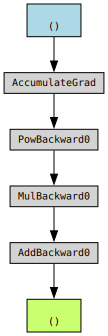

In [21]:
from torchviz import make_dot

make_dot(y)

Calculemos los gradientes con backpropagation:

*   Al terminar todas las operaciones que se le aplicarán al tensor, se puede llamar al método .backward(), que calculará todos los gradientes automáticamente.
*   La derivada parcial de la función con respecto al tensor se acumulará en el atributo .grad

In [26]:
# Calculamos los gradientes
y.backward()
print('dy/dx = ', x.grad)

# Estas derivadas no serán calculadas por que el tensor no estaba acumulando
print('dy/da = ', a.grad)
print('dy/db = ', b.grad)

dy/dx =  tensor(4., dtype=torch.float64)
dy/da =  None
dy/db =  None


### Optimización durante el entrenamiento de algún modelo

Durante el ciclo de entrenamiento, se realizan operaciones con los pesos del modelo y después se requiere **actualizar** los pesos calculados (optimización). Esta operación de actualización de pesos **no debe acumularse** en el gradiente. Para solucionarlo, existen varias alternativas:

*  x.requires_grad_(False) $ \quad$  ----> cambia la bandera existente 'in-place'
*  x.detach()             $ \quad$ ----> obtener un nuevo tensor con el mismo contenido pero sin cálculos de gradiente.
*  with torch.no_grad():   $ \quad$----> envolver instrucciones en 'with torch.no_grad():'


Además, .backward() acumula el gradiente para el tensor en el atributo .grad, por lo que se debe ser cuidadoso durante la optimización.

Se utiliza
> .zero_()

para **vaciar la acumulación del gradiente** antes de un nuevo paso de optimización.

In [31]:
# Ejemplo de modelo simple
weights = torch.ones(4, requires_grad=True) # Pesos que requieren acumulación de gradiente
lrRate = 0.1

for epoch in range(3):
    model_output = (3*weights**2).sum() # Operaciones
    
    # Acumulamos el gradiente
    model_output.backward()

    # Imprimimos el gradiente
    print(f"weights - epoch {epoch}: {weights.grad}")

    # Optimizar modelo, actualizar pesos.
    # (En la práctica, estos pasos se suelen hacer automáticamente por medio de implementaciones en la librería)
    with torch.no_grad(): # No acumula gradiente
        weights -= lrRate * weights.grad

    # Vaciar gradiente
    weights.grad.zero_()

print(weights)
print(model_output)
print(weights.grad)

weights - epoch 0: tensor([6., 6., 6., 6.])
weights - epoch 1: tensor([2.4000, 2.4000, 2.4000, 2.4000])
weights - epoch 2: tensor([0.9600, 0.9600, 0.9600, 0.9600])
tensor([0.0640, 0.0640, 0.0640, 0.0640], requires_grad=True)
tensor(0.3072, grad_fn=<SumBackward0>)
tensor([0., 0., 0., 0.])


La palabra reservada **with** permite utilizar el context manager de la liberia PyTorch para evitar la acumulación de gradientes en tensores específicos. Un context manager es una construcción en Python que asegura que ciertos recursos se inicialicen y limpien adecuadamente. Cuando usas la instrucción with, el context manager se encarga de ejecutar el código necesario antes y después del bloque with. El context manager hace básicamente lo siguiente:

1.	Método \_\_enter\_\_:
	•	Guarda el estado actual de grad_enabled.
	•	Desactiva el cálculo de gradientes usando torch.set_grad_enabled(False).
2.	Método \_\_exit\_\_:
	•	Restaura el estado de grad_enabled al valor que tenía antes de entrar en el contexto.

Los algoritmos de optimización implementados en la librería (ejemplo: torch.optim.SGD) incluyen el método zero_grad() para reiniciar la acumulación de gradientes:

In [32]:
# Optimizador SGD
optimizer = torch.optim.SGD([weights], lr=0.1)
# Durante el entrenamiento:
model_output = (3*weights**2).sum()
model_output.backward()
optimizer.step()  # <------- Aqui realizamos el paso en descenso de gradiente automáticamente

print("weights.grad, antes de reiniciar acumulacion de grad: ", weights.grad)

optimizer.zero_grad() # <-------

print('\nweights: ', weights)
print('\nmodel_output: ', model_output)
print("\nweights.grad, después de reiniciar acumulacion de grad: ", weights.grad)

weights.grad, antes de reiniciar acumulacion de grad:  tensor([0.3840, 0.3840, 0.3840, 0.3840])

weights:  tensor([0.0256, 0.0256, 0.0256, 0.0256], requires_grad=True)

model_output:  tensor(0.0492, grad_fn=<SumBackward0>)

weights.grad, después de reiniciar acumulacion de grad:  None


## Regresión logística

Tratamos con un problema de clasificación binaria. Estamos utilizando datos médicos de los datasets de la librería scikit-learn. Hay dos clases con diferentes atributos, algunas personas tienen cáncer y otras no. Queremos entrenar nuestro clasificador binario para poder hacer predicciones de probabilidad de cancer según atributos. 

Para casi cualquier modelo que entrenemos necesitamos hacer lo siguiente:

0) Preparar datos  
1) Definir modelo  
2) Función de pérdida (loss) y optimizador  
3) Ciclo de entrenamiento  
4) Evaluación del modelo

In [33]:
# Librerias

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Preparación de datos

In [70]:
# Cargamos los datos del dataset de scikit-learn
bc = datasets.load_breast_cancer()
print(type(bc),'\n')

print(bc.__doc__)

print(bc.keys())

<class 'sklearn.utils._bunch.Bunch'> 

Container object exposing keys as attributes.

    Bunch objects are sometimes used as an output for functions and methods.
    They extend dictionaries by enabling values to be accessed by key,
    `bunch["value_key"]`, or by an attribute, `bunch.value_key`.

    Examples
    --------
    >>> from sklearn.utils import Bunch
    >>> b = Bunch(a=1, b=2)
    >>> b['b']
    2
    >>> b.b
    2
    >>> b.a = 3
    >>> b['a']
    3
    >>> b.c = 6
    >>> b['c']
    6
    
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [80]:
# Dividimos los datos
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(f"El número de features es: {n_features}")

# Dividimos los datos usando la funcion split de scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Scale
# StandardScaler es una herramienta en scikit-learn que estandariza las características 
# eliminando la media y escalando a la varianza unitaria.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convertimos los numpy.ndarray a tensores de pytorch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# Cambiar dimensión
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

El número de features es: 30


### Definición de modelo

Definimos un modelo lineal para clasificación binaria, es decir:

1. Modelo Lineal:
$$
f = wx + b 
$$
2.	Función de Activación (Sigmoide):
$$
z = \sigma(f) 
$$

El modelo lineal se define por una combinación lineal de las entradas y los pesos, seguido de una función de activación sigmoide para clasificación binaria. En el caso de clasificación multiclase en lugar de una sigmoide, se utiliza una función softmax.

In [72]:
# Definición de modelo
class Model(nn.Module): # Se hereda de la clase nn.Module
    
    # Constructor. Define el esqueleto del modelo. Hay que poner tamaños, etc...
    def __init__(self, n_input_features):
        super(Model, self).__init__() # Llama al constructor de la clase base para poder inicializar el módulo
        
        # Define una capa lineal. Es una capa full conected con n entradas y 1 salida   
        self.linear = nn.Linear(n_input_features, 1) 

    # Método forward. Define como pasa la entrada a través del modelo para producir una salida
    def forward(self, x):

        # Pasa la salida de la capa lineal en una función sigmoide
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred # Devuelve la predicción

# Crea una instancia del modelo
model = Model(n_features)

### Función de pérdida y optimizador

In [76]:
num_epochs = 100 # Definimos el número de epocas
learning_rate = 0.01
criterion = nn.BCELoss() # Función de pérdida. Binary Cross Entropy 
# Sthocastic Gradient Desc. Le pasamos los parametros del modelo
print(model.parameters)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<bound method Module.parameters of Model(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)>


### Ciclo de entrenamiento

In [81]:
# 3) Ciclo de entrenamiento
for epoch in range(num_epochs):
    
    # Forward pass. No hay necesidad de llamar al método forward
    y_pred = model(X_train)

    # Loss
    loss = criterion(y_pred, y_train) # Encontramos el error entre la predicción y la realidad

    # Backward pass and optimization
    loss.backward() # Calculamos los gradientes

    # Update
    optimizer.step() # Actualizamos el paso del modelo

    # Vaciamos el gradiente
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        # Solo imprimimos los multiplos de 10
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.2395
Epoch [20/100], Loss: 0.2300
Epoch [30/100], Loss: 0.2216
Epoch [40/100], Loss: 0.2141
Epoch [50/100], Loss: 0.2073
Epoch [60/100], Loss: 0.2011
Epoch [70/100], Loss: 0.1954
Epoch [80/100], Loss: 0.1902
Epoch [90/100], Loss: 0.1855
Epoch [100/100], Loss: 0.1810


In [83]:
# Predicción ejemplo
with torch.no_grad():
    X_test = torch.randn(10, n_features)  # 10 ejemplos de prueba
    y_test_pred = model(X_test)
    print(y_test_pred)

tensor([[0.8095],
        [0.4007],
        [0.6788],
        [0.5545],
        [0.8653],
        [0.6452],
        [0.5068],
        [0.5981],
        [0.1797],
        [0.7007]])


### Evaluación del modelo

In [82]:
with torch.no_grad(): # Para no acumular el gradiente
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    # Calculamos el accuracy
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.8860


En un modelo de regresión logística, los pesos son parámetros que se ajustan durante el entrenamiento para minimizar la función de pérdida. En este ejemplo, los pesos están en la capa lineal del modelo.

**Dónde están los Pesos**

Los pesos en una red neuronal están contenidos en la capa lineal (nn.Linear). La clase nn.Linear tiene dos tipos de parámetros:
* weight: La matriz de pesos que multiplica las entradas.
* bias: El sesgo que se suma al resultado de la multiplicación de pesos.

Cuando creas una instancia de nn.Linear, PyTorch inicializa estos pesos y sesgos automáticamente. Durante el entrenamiento, estos parámetros se ajustan para minimizar la función de pérdida.

1.	Inicialización de Pesos:
	* Cuando creas la capa lineal self.linear = nn.Linear(n_input_features, 1), PyTorch inicializa automáticamente los pesos y sesgos de esta capa.
2.	Pesos y Sesgos:
	* Puedes acceder a los pesos y sesgos directamente a través de los atributos de la capa lineal:

In [86]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[-0.2283, -0.0430, -0.1024, -0.1784, -0.2034, -0.0286, -0.1555, -0.3092,
          0.0331, -0.0213, -0.0812, -0.0896, -0.2627, -0.1033,  0.0732,  0.1199,
         -0.1208, -0.0759,  0.0262,  0.0709, -0.2755, -0.0570, -0.1559, -0.3434,
         -0.0538, -0.2774, -0.1110, -0.3863, -0.1085, -0.1424]],
       requires_grad=True)
Parameter containing:
tensor([0.2791], requires_grad=True)


3.	Gradientes:
	* Durante la fase de backward pass (loss.backward()), PyTorch calcula los gradientes de la función de pérdida con respecto a cada parámetro (pesos y sesgos) del modelo. Estos gradientes se almacenan en los atributos grad de los parámetros.
	* Puedes acceder a los gradientes después de la backward pass:

In [87]:
print(model.linear.weight.grad)
print(model.linear.bias.grad)

None
None
